In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/raghavsharma/desktop/1645792390_cep1_dataset1.xlsx"

# Read data from the Excel file into a DataFrame
df = pd.read_excel(file_path)
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [26]:
#Q1 a) The below steps are for preliminary analysis of the data:

# Check the structure of the data (number of rows and columns)
print("Data Structure:")
print(df.shape)


# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for duplicates
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicates)


#Q2 b) Removing duplicates
df = df.drop_duplicates()


#Q2 b) treating missing values
# Identify missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("\nMissing Values:")
print(missing_values[missing_values > 0])


df.fillna(df.mean(), inplace=True)

# Check if missing values have been treated
print("\nMissing Values After Treatment:")
print(df.isnull().sum())

Data Structure:
(302, 14)

First Few Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Summary Statistics:
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686 

In [24]:
#Q2 a) Preliminary statistical summary of the data and explore the measuires of central tendencies 
# and spread of the data

# Explore measures of central tendencies and spread
# Calculate mean, median, and mode for specific columns

# Step 1: Preliminary Statistical Summary
summary_stats = df.describe()

# Display the summary statistics
print("Preliminary Statistical Summary:")
print(summary_stats)

# Step 2: Explore Measures of Central Tendencies and Spread
# Calculate mean, median, and mode for specific columns
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

mean_chol = df['chol'].mean()
median_chol = df['chol'].median()
mode_chol = df['chol'].mode()[0]

# Print measures of central tendencies
print("\nMeasures of Central Tendency:")
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

print(f"\nMean Cholesterol: {mean_chol}")
print(f"Median Cholesterol: {median_chol}")
print(f"Mode Cholesterol: {mode_chol}")


#In the above example, we have calculated mean, median and mode for two of the columns: Age and Cholestrol.
#Similar can be done for any of the columns of interest.

Preliminary Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.7293

In [27]:
#Q2 b) Firstly, we need to identify the columns which are categorical:
categorical_columns = df.select_dtypes(include=['object']).columns

print(categorical_columns)

#As we can see, there are no categorical columns in the given dataset.

Index([], dtype='object')


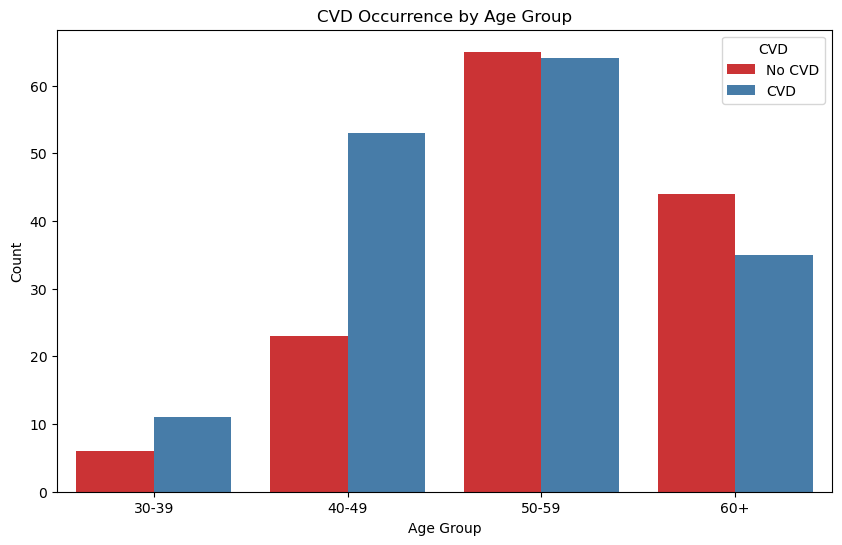

In [30]:
#Q2 c) In this section, we study the occurence of CVD across the age category:

# Create age groups for analysis (we can customize the age groups)
age_bins = [29, 40, 50, 60, 80]
age_labels = ['30-39', '40-49', '50-59', '60+']

# Categorize age into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Create a count plot to visualize CVD occurrence by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='target', palette='Set1')
plt.title('CVD Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No CVD', 'CVD'])
plt.xticks(rotation=0)
plt.show()

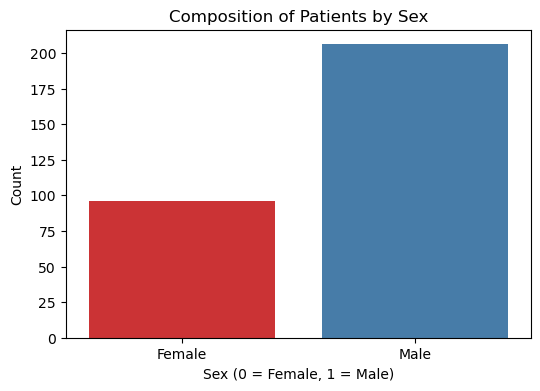

In [31]:
#Q2 d) We look at the composition of all the patients with respect to the sex category:

# Create a count plot to visualize the composition of patients by sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', palette='Set1')
plt.title('Composition of Patients by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

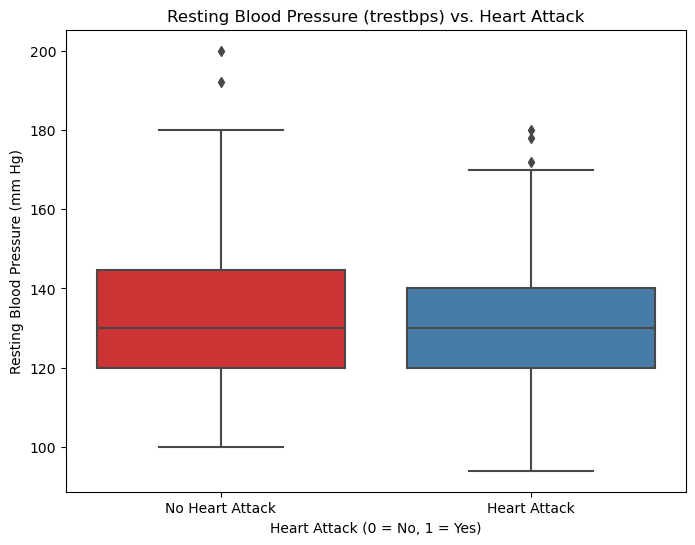

In [32]:
#Q2 e) We check if heart attacks can be detected using the anomolies in the resting blood pressure

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='trestbps', palette='Set1')
plt.title('Resting Blood Pressure (trestbps) vs. Heart Attack')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

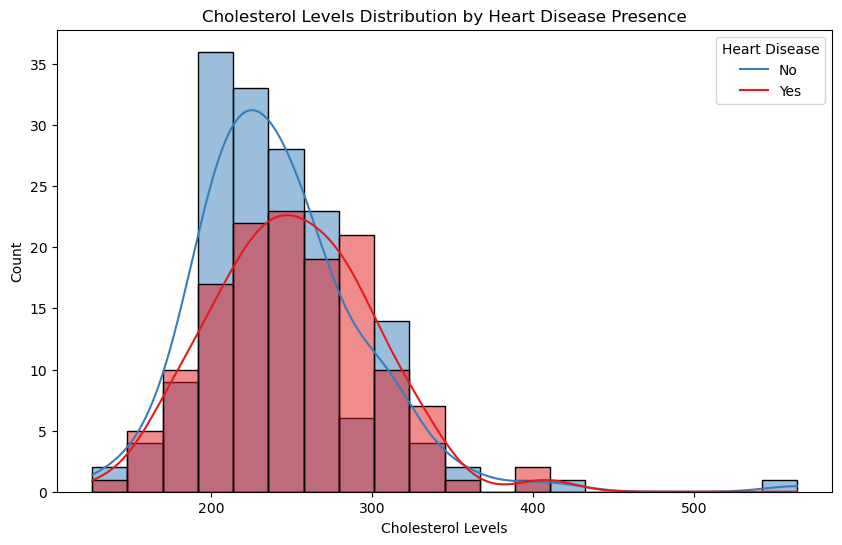

In [33]:
#Q2 f) relationship between cholestrerol levels and a target variable


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='target', bins=20, kde=True, palette='Set1')
plt.title('Cholesterol Levels Distribution by Heart Disease Presence')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


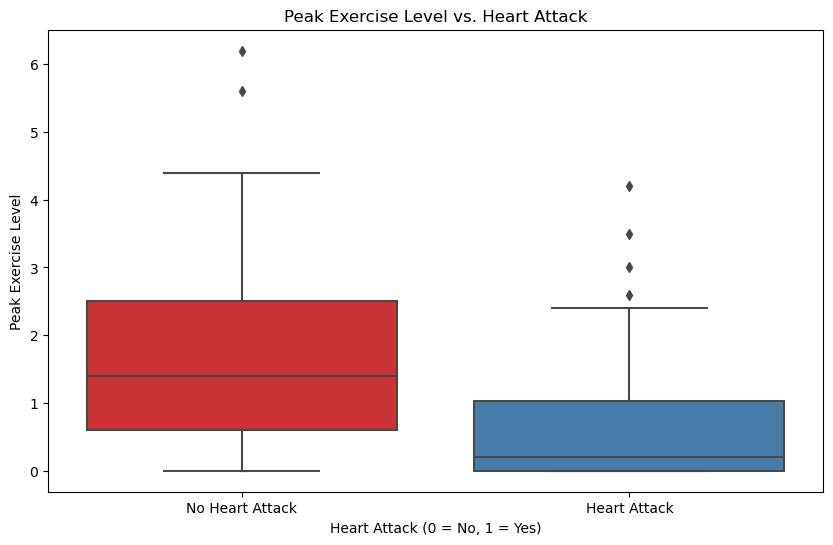

In [36]:
#Q2 g) Relationship between peak exercise and target variable

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='oldpeak', palette='Set1')
plt.title('Peak Exercise Level vs. Heart Attack')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Peak Exercise Level')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()


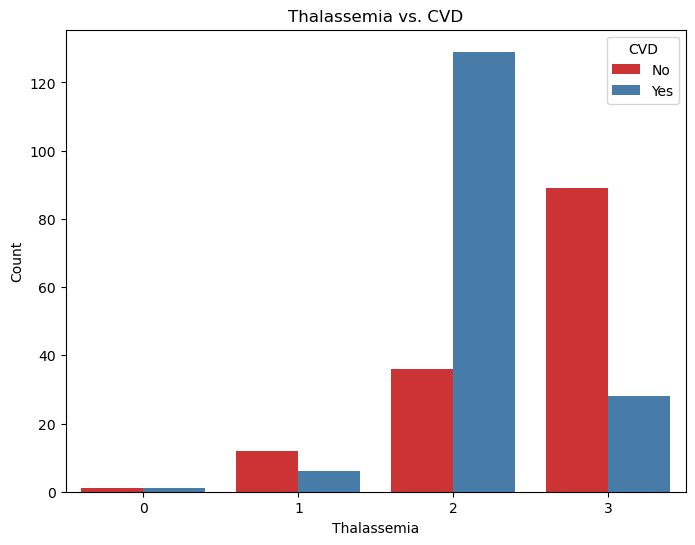

In [37]:
#Q2 h) checking if thalassemia is a major cause of CVD

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='thal', hue='target', palette='Set1')
plt.title('Thalassemia vs. CVD')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No', 'Yes'])
plt.show()


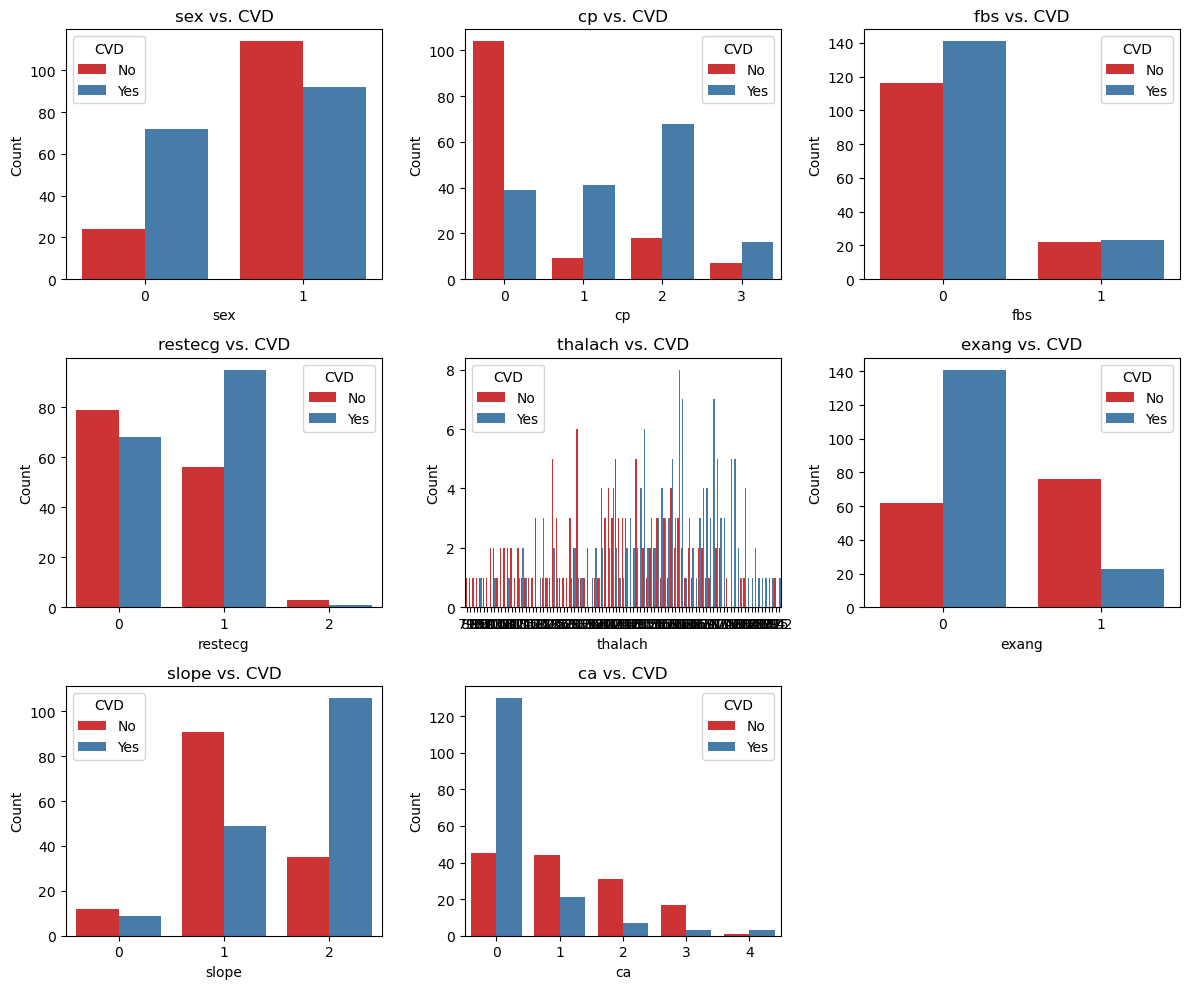

In [39]:
# Q2 i)

# Select relevant columns excluding age, thalassemia, oldpeak, trestbps, and cholesterol
selected_columns = ['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'target']
df_selected = df[selected_columns]

# Visualize the relationship between each variable and the occurrence of CVD
plt.figure(figsize=(12, 10))
for i, column in enumerate(df_selected.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_selected, x=column, hue='target', palette='Set1')
    plt.title(f'{column} vs. CVD')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='CVD', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


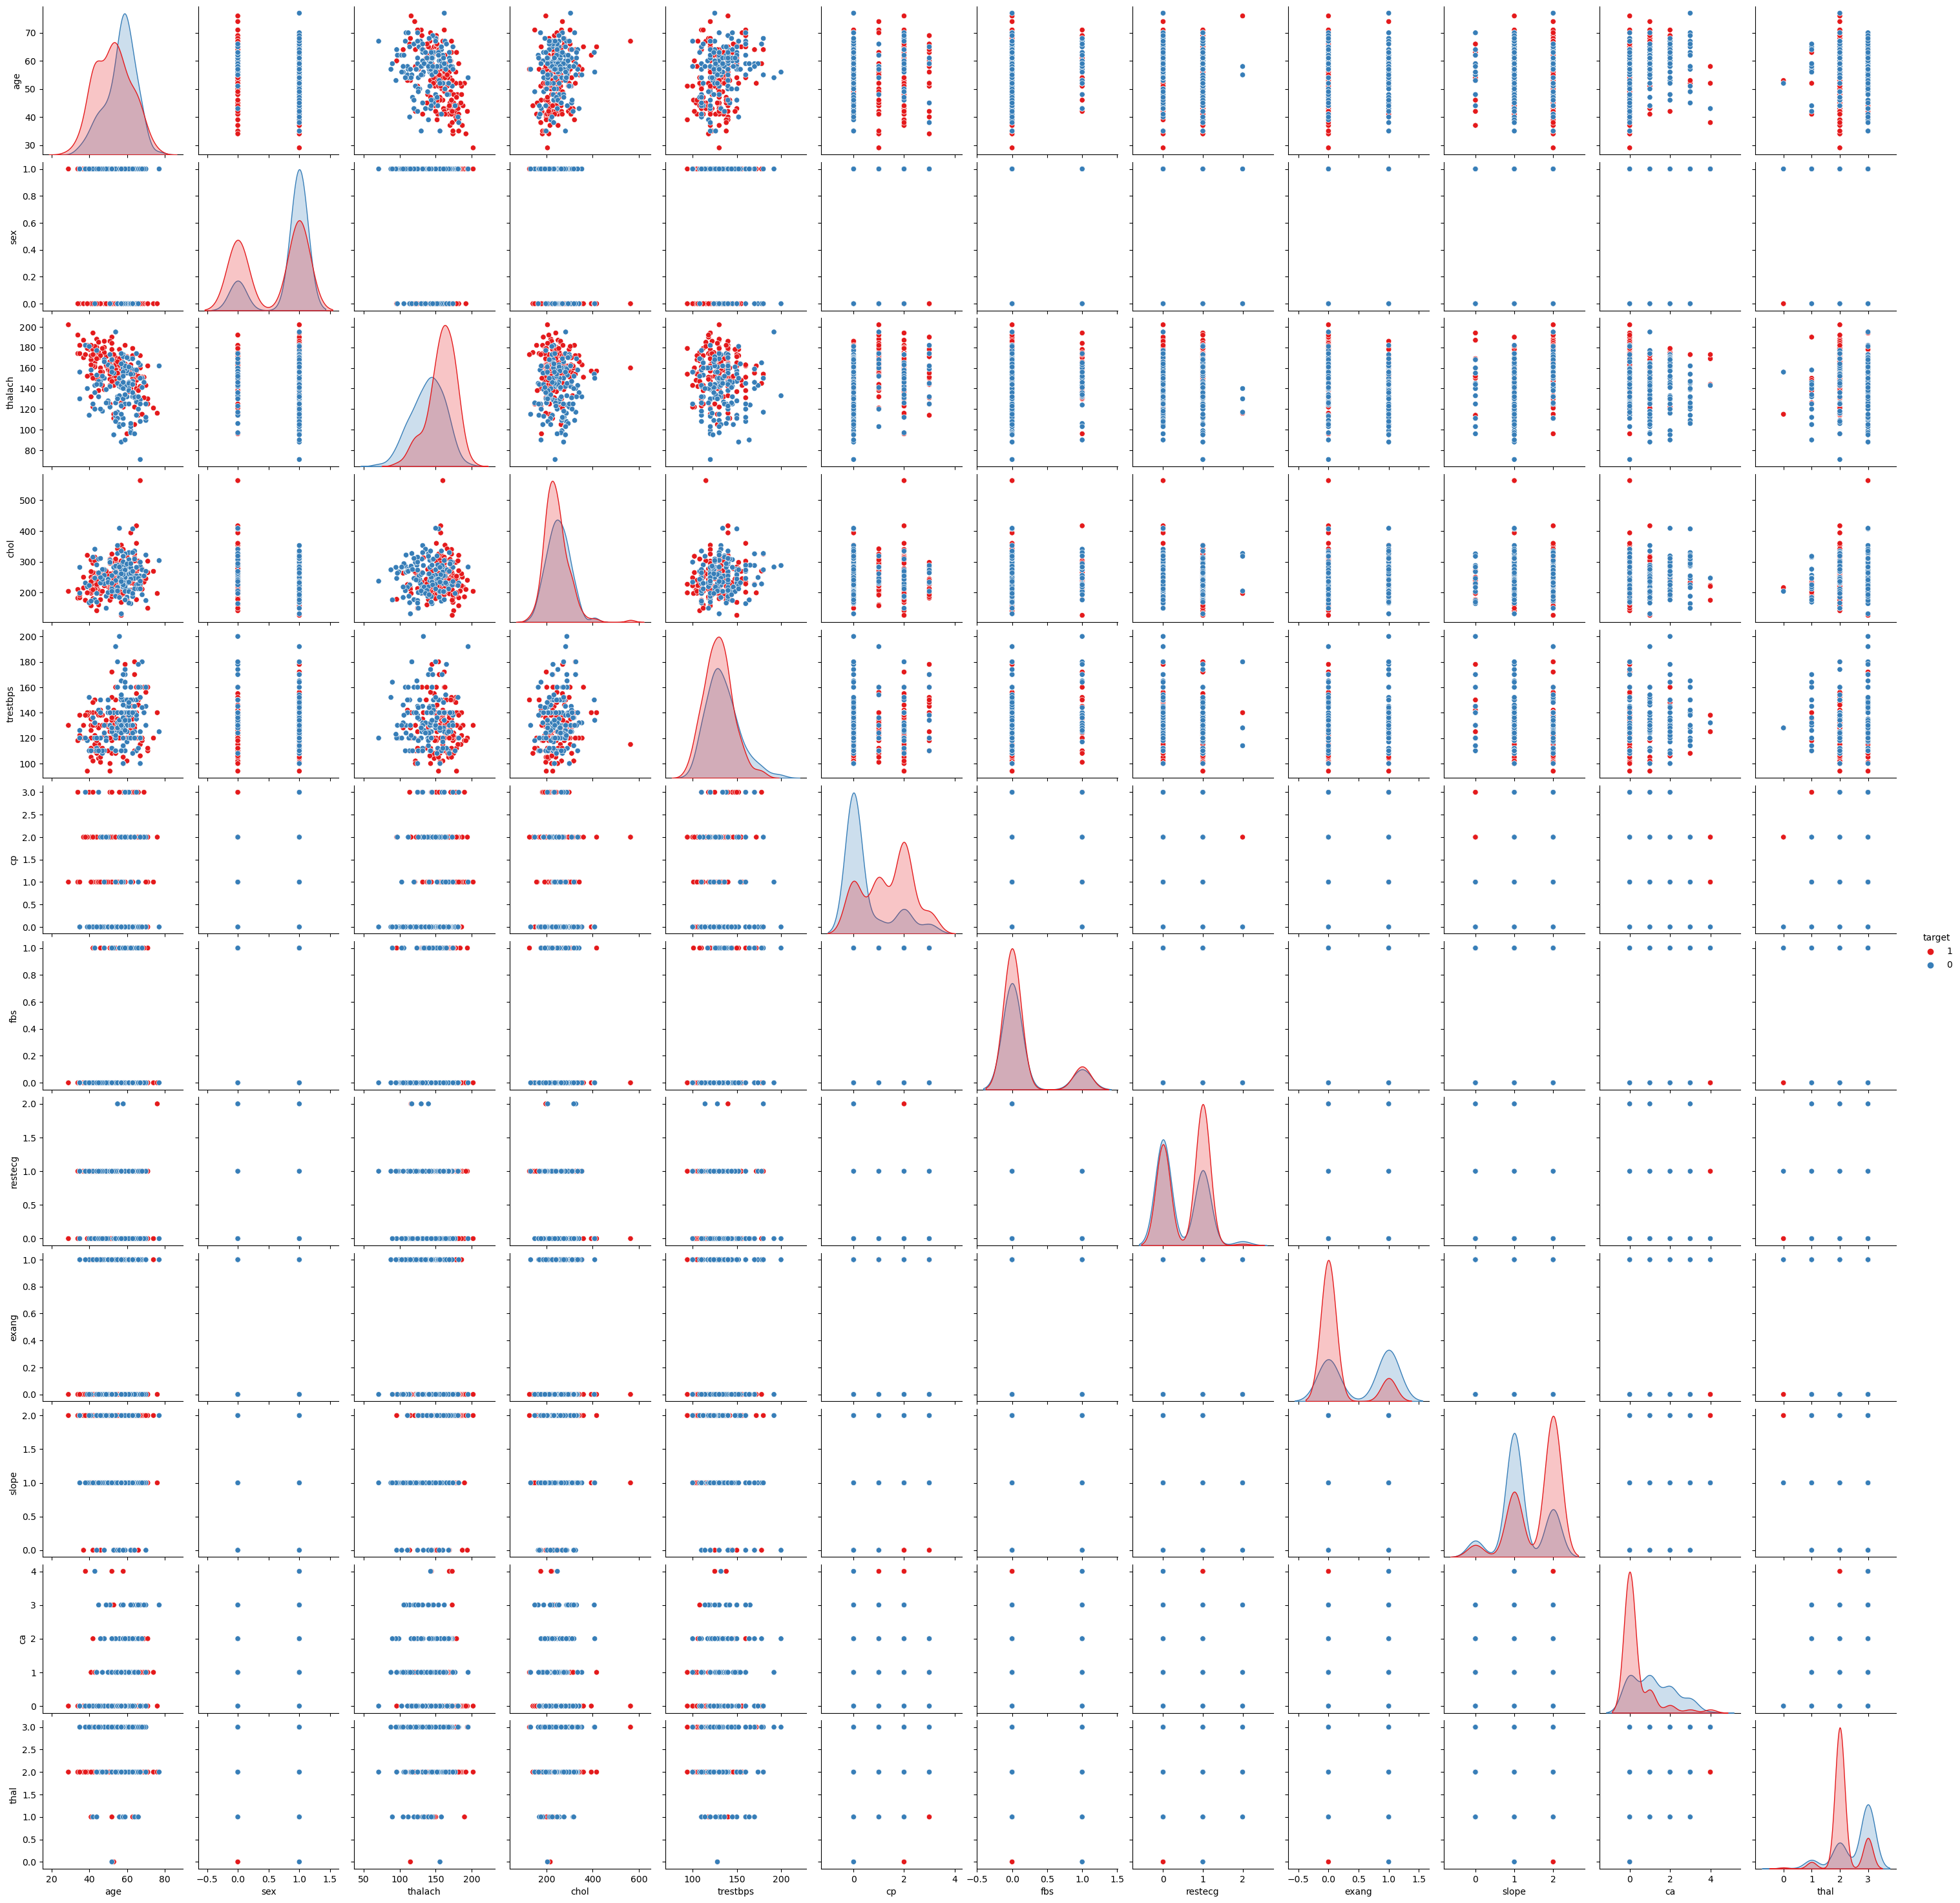

In [43]:
#Q2 J)

selected_variables = ['age', 'sex', 'thalach', 'chol', 'trestbps', 'target', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a DataFrame with only the selected variables
df_selected = df[selected_variables]

# Create a copy of the DataFrame and convert 'target' to a string type in the copy
df_copy = df_selected.copy()
df_copy['target'] = df_copy['target'].astype(str)

# Create a pair plot
sns.pairplot(df_copy, hue='target', diag_kind='kde', palette='Set1')
plt.show()

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/Users/raghavsharma/desktop/1645792390_cep1_dataset1.xlsx"

# Read data from the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Select features (exclude the target variable)
X = df.drop(columns=['target'])

# Target variable
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [61]:
# Build a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic= accuracy_score(y_test, y_pred_logistic)
confusionmatrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classificationreport_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusionmatrix_logistic)
print("Classification Report:\n", classificationreport_logistic)


Logistic Regression Model:
Accuracy: 0.8688524590163934
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [64]:
# Build a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusionmatrix_rf = confusion_matrix(y_test, y_pred_rf)
classificationreport_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusionmatrix_rf)
print("Classification Report:\n", classificationreport_rf)

Random Forest Model:
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



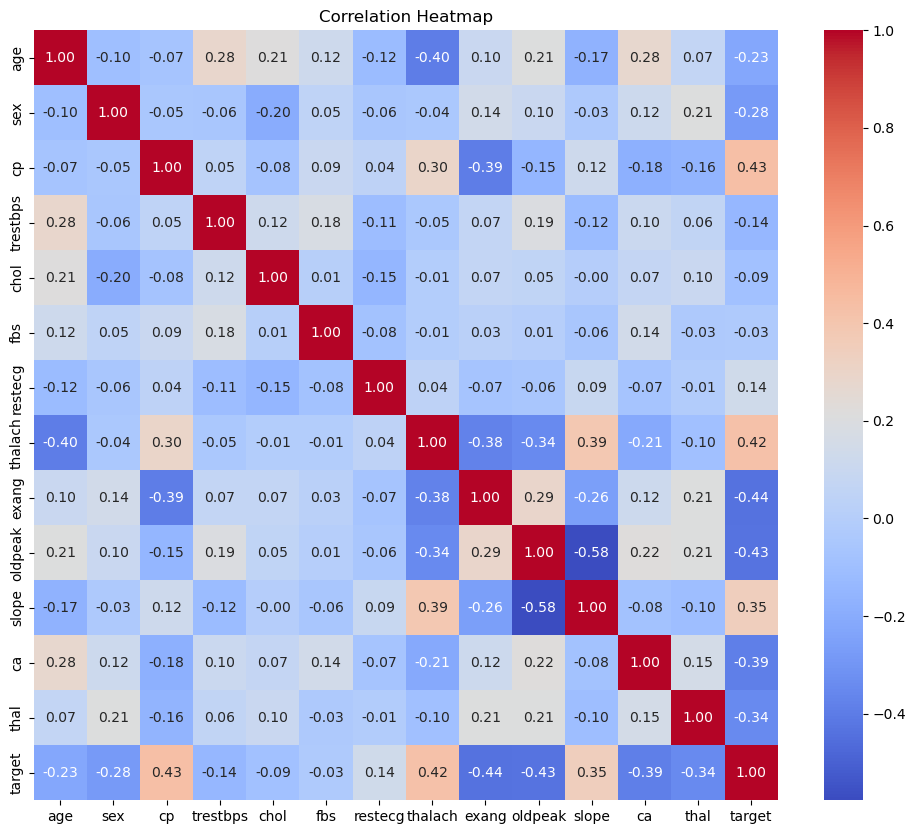

In [58]:
# Perform feature selection using correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [59]:
# Perform logistic regression with p-values for feature selection
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4937
Time:                        22:37:37   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.